 Import libraries

In [219]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


Load MNIST dataset

In [220]:
from sklearn.datasets import load_digits
digits = load_digits()
X_full = digits.data      # All 1797 × 64 samples
y_full = digits.target    # All labels 0-9
mask = (y_full == 0) | (y_full == 1)  # Boolean mask: True for samples where label is 0 OR 1
X = X_full[mask]    # ~360 × 64: Only 0/1 samples
y = y_full[mask]    # ~360: Only labels 0/1
print(f"Full dataset shape: {X.shape}, Labels: {np.bincount(y)}")

Full dataset shape: (360, 64), Labels: [178 182]


In [221]:
digits.images.shape #(1797, 8, 8)—original 2D images

(1797, 8, 8)

In [222]:
digits.target.shape #(1797,) array—labels (0-9)

(1797,)

In [223]:
digits.data.shape #(1797, 64) array—flattened pixel vectors

(1797, 64)

In [224]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

For showing image

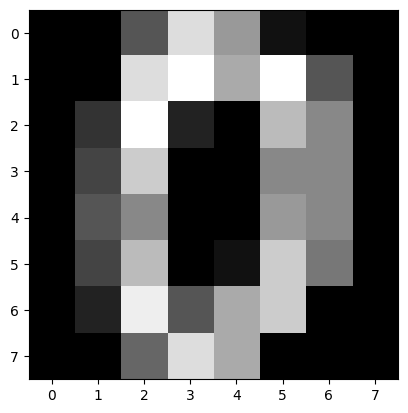

In [225]:
import matplotlib.pyplot as plt
plt.imshow(X[0].reshape(8, 8),cmap='gray')

Normalize pixel values

In [226]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split into train/val/test (60/20/20)

In [227]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, stratify=y) # 70% training test and 30% temporary set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp) # 15% test and 15% validation set
print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

Train: (252, 64), Val: (54, 64), Test: (54, 64)


Percempron


In [228]:
#Train Perceptron
perceptron = Perceptron(max_iter=1000, eta0=0.01)
perceptron.fit(X_train, y_train)
#Train performance
train_pred = perceptron.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
# Validation performance
val_pred = perceptron.predict(X_val)
val_acc = accuracy_score(y_val, val_pred)
# Test performance
test_pred = perceptron.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
print(f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}")


Train Acc: 1.0000, Val Acc: 1.0000, Test Acc: 1.0000


Logistic Regression

In [229]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
#Train performance
train_pred_lr = log_reg.predict(X_train)
train_acc_lr = accuracy_score(y_train, train_pred_lr)
# Validation performance
val_pred_lr = log_reg.predict(X_val)
val_acc_lr = accuracy_score(y_val, val_pred_lr)
# Test performance
test_pred_lr = log_reg.predict(X_test)
test_acc_lr = accuracy_score(y_test, test_pred_lr)
print(f"Train Acc: {train_acc_lr:.4f}, Val Acc: {val_acc_lr:.4f}, Test Acc:{test_acc_lr:.4f}")

Train Acc: 1.0000, Val Acc: 1.0000, Test Acc:1.0000


In [230]:
svm_model = SVC(kernel="linear", C=1.0)
# Train on training set
svm_model.fit(X_train, y_train)
#Train performance
y_train_pred_svm = svm_model.predict(X_train)
train_acc_svm = accuracy_score(y_train, y_train_pred_svm)
# Validation performance
y_val_pred_svm = svm_model.predict(X_val)
val_acc_svm = accuracy_score(y_val, y_val_pred_svm)
# Test performance
y_test_pred_svm = svm_model.predict(X_test)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"Train Acc: {train_acc_svm:.4f}, Val Acc: {val_acc_svm:.4f}, Test Acc: {test_acc_svm:.4f}")


Train Acc: 1.0000, Val Acc: 1.0000, Test Acc: 1.0000


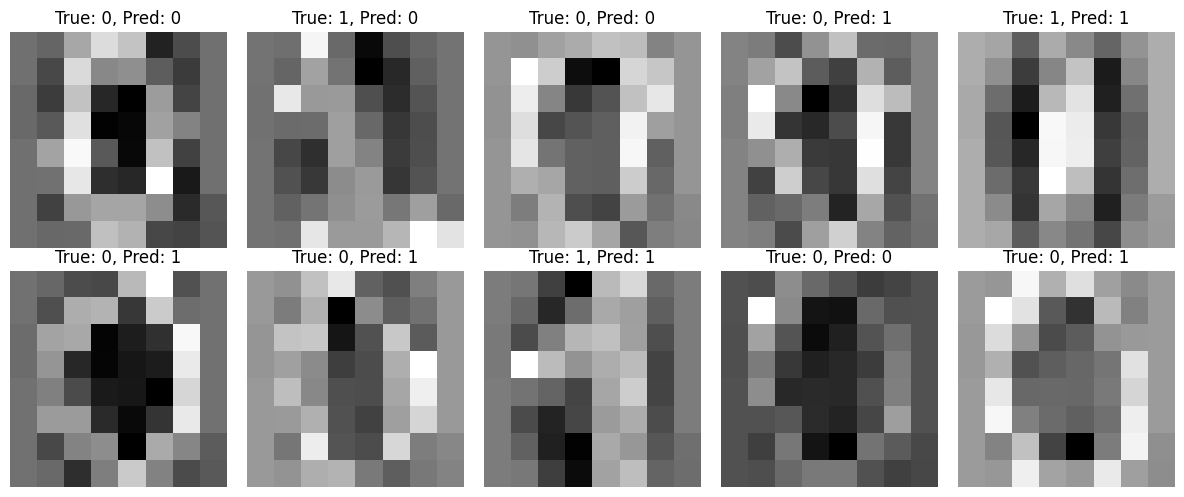

In [231]:
# Visualize test samples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    if i < len(X_test):
        img = X_test[i].reshape(8, 8)
        ax.imshow(img, cmap='gray')
        ax.set_title(f'True: {y_test[i]}, Pred: {val_pred[i]}')
        ax.axis('off')
plt.tight_layout()

##Conclusion:
The Perceptron is a simple linear classifier that performs well for binary classification when the data is linearly separable, such as distinguishing digits 0 and 1 in the MNIST dataset. However, Logistic Regression provides better performance due to its probabilistic framework and optimized loss function, resulting in more stable and accurate predictions.In contrast, the Support Vector Machine (SVM) achieved superior performance by identifying an optimal decision boundary with maximum margin between classes, resulting in better generalization on unseen data.